### Parameters

- Components of the model that are learned during the modeling process.
- The algorithm discovers them through undertaking its steps.
- The coefficients are parameters because we did not set them ourselves and were learned during the modeling process. You can reach them by model.coef_() in scikitlearn.

Let's see an example for the coefficients.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/default_of_credit_card_clients.csv')

In [3]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Split dataset into train and test

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data.loc[1:, data.columns != 'Y']
y = data.loc[1:, 'Y']

In [6]:
print(f"X: {X.shape}")
print(X.head(3))
print(f"y: {y.shape}")
print(y.head(3))

X: (30000, 24)
  Unnamed: 0      X1 X2 X3 X4  X5  X6 X7  X8  X9  ...    X14    X15    X16  \
1          1   20000  2  2  1  24   2  2  -1  -1  ...    689      0      0   
2          2  120000  2  2  2  26  -1  2   0   0  ...   2682   3272   3455   
3          3   90000  2  2  2  34   0  0   0   0  ...  13559  14331  14948   

     X17   X18   X19   X20   X21   X22   X23  
1      0     0   689     0     0     0     0  
2   3261     0  1000  1000  1000     0  2000  
3  15549  1518  1500  1000  1000  1000  5000  

[3 rows x 24 columns]
y: (30000,)
1    1
2    1
3    0
Name: Y, dtype: object


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_test.shape

(9000, 24)

## Train a Logistic Regression model on this data 
and take a look at the coefficients

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg_cls = LogisticRegression()

In [11]:
log_reg_cls.fit(X_train, y_train)

/Users/nazaninhesari/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
log_reg_cls.coef_

array([[-2.62457462e-05, -4.03305511e-06, -1.13930810e-06,
        -1.26502170e-06, -1.21852306e-06, -1.54984258e-05,
         3.17216477e-06,  2.54722648e-06,  2.20952799e-06,
         2.04234605e-06,  1.81638877e-06,  1.68774181e-06,
        -9.10997618e-06,  5.13604772e-06,  2.66584064e-06,
         2.46931516e-06,  9.69032466e-07,  2.04116339e-06,
        -2.61440910e-05, -2.45427121e-05, -8.66085181e-06,
        -4.87289338e-06, -5.98182764e-06, -2.51969154e-06]])

In [13]:
original_variables = list(data.loc[0].values)
zip_together = list(zip(original_variables, log_reg_cls.coef_[0]))
coefs = [list(x) for x in zip_together]

In [14]:
coefs_df = pd.DataFrame(coefs, columns = ["Variable", "Coefficient"])
coefs_df.sort_values(by="Coefficient", axis=0, inplace=True, ascending=False)
coefs_df.head(5)

,Variable,Coefficient
13,BILL_AMT2,0.000005
6,PAY_0,0.000003
14,BILL_AMT3,0.000003
7,PAY_2,0.000003
15,BILL_AMT4,0.000002


As you can see, the coefficients are set to each variable during modeling process. Seems like Bill_AMT2 has a high influence on the result.

### Let's check for Tree based models 

The trees do not have coefficients, but they have deision nodes.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_cls = RandomForestClassifier(max_depth=2)

In [17]:
rf_cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

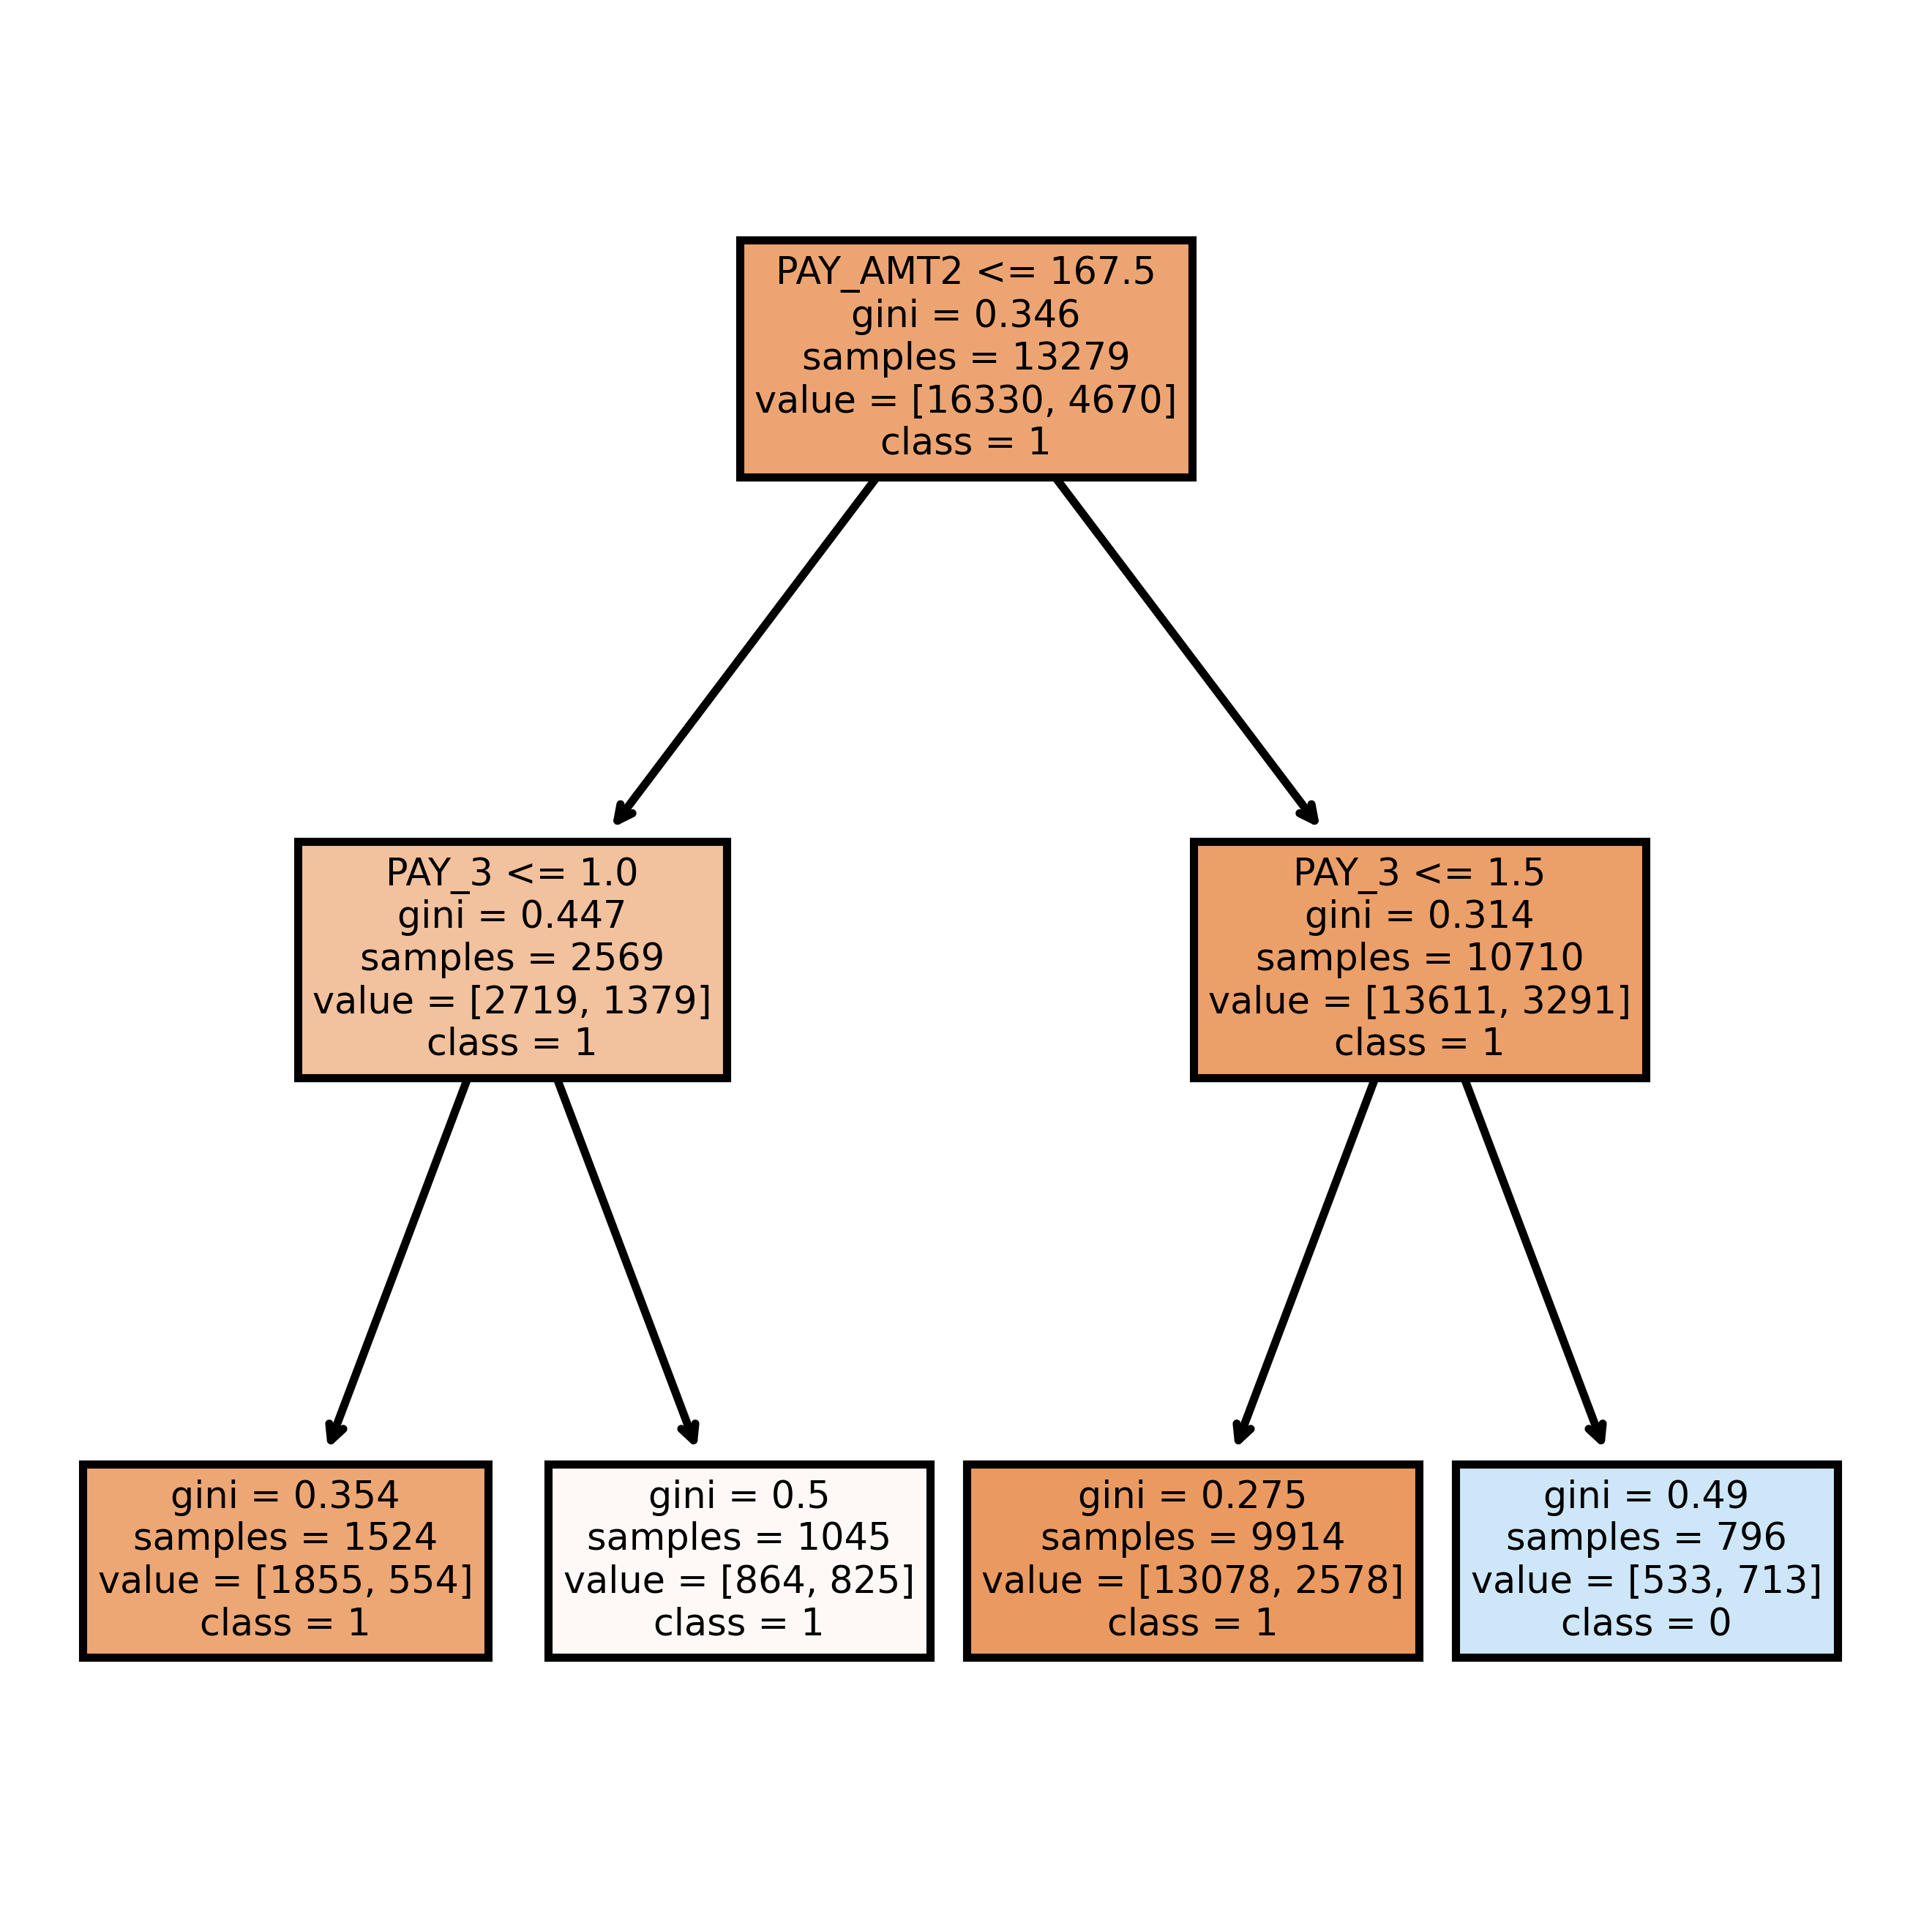

In [26]:
import matplotlib.pyplot as plt
fn=original_variables[:-1]
cn=y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_cls.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_cls_tree.png')

Let's extract node decisions :)

In [37]:
rf_cls_tree = rf_cls.estimators_[0]
split_column = rf_cls_tree.tree_.feature[0]
split_column_name = original_variables[split_column]
split_value = rf_cls_tree.tree_.threshold[0]

print(f"This node split on feature {split_column_name} at a value of {split_value}")

This node split on feature PAY_AMT2 at a value of 167.5


### Hyperparameters

Hyperparameters are something that you set **before the modeling process** begins. The algorithm **does not learn** the value of these during the modeling process. This is the crucial differentiator between **hyperparameters** and **parameters**. 


So far, we discussed the parameters in Logistic Regrssion and Random Forest Classifiers. 

Let's take a look at their hyperparameters:

In [46]:
log_reg_cls.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
rf_cls.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### It's important to know the HP of the models.

Changing some hyperparameters won't effect the model performance, such as n_jobs, verbose, random_state, etc.
While some will make changes such as n_estimators, max_depths, max_features, etc.

### What is the best value for hyperparameters? 

It only depends on the algorithm you choose. By experimenting different values you'll get to the best answer for sure. BUT! You can avoid some silliy decisions!!

- do not set small numbers for n_estimators in a Random Forest Classifier,
- also, do not set small neighbours for KNN,
- increasing or decreasing a hyperparameter won't effect your model performance!
- avoid conflicts, such as 'solver' and 'penalty' in Logistic Regression.


### Choosing best hyperparameter by experiment? You'll need some automation!

Let's see some examples in practice...

#### 1. using for loop

In [55]:
from sklearn.metrics import accuracy_score
num_trees = [10, 50, 75, 100, 200]
accuracy_list = []
for num in num_trees:
    cls = RandomForestClassifier(n_estimators=num)
    y_pred = cls.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

In [56]:
result_df = pd.DataFrame({'N_estimators': num_trees, 'Accuracy': accuracy_list})
result_df

,N_estimators,Accuracy
0,10,0.805000
1,50,0.814667
2,75,0.815333
3,100,0.814222
4,200,0.817111


#### 2. using Learning Curve

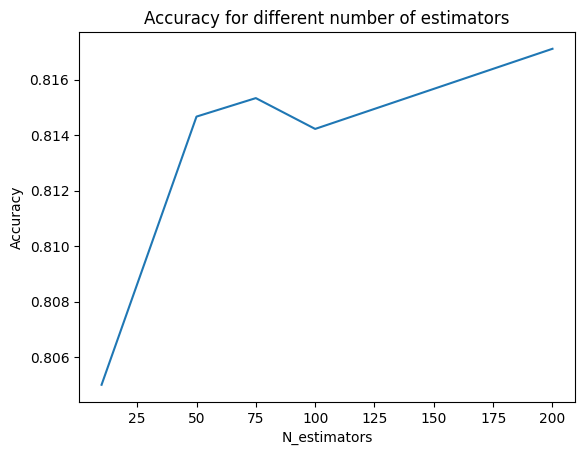

In [57]:
plt.plot(result_df['N_estimators'], result_df['Accuracy'])
plt.gca().set(xlabel='N_estimators' , ylabel='Accuracy', title="Accuracy for different number of estimators") 
plt.show()